In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import make_pipeline
from classes import (
    NewColumnTransformer,
    ColumnDropper,
    DuplicateRemover,
    ConditionalRowRemover,
    CustomImputer,
    OutlierRemover_IQR,
    CustomLabelEncoder,
    CustomPowerTransformer,
    NormalizeTransformer
)

In [2]:
file_path = r""   # complete with the path to the data file (HotelCustomersDataset.xlsx or .csv)

raw_data = pd.read_csv(file_path, index_col="ID")   # if the file is .xlsx, change read_csv to read_xlsx
raw_data_copy = raw_data.copy() # used in EDA
raw_data_copy

,Nationality,Age,DaysSinceCreation,NameHash,DocIDHash,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,...,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom
ID,,,,,,,,,,,,,,,,,,,,,
1,PRT,51.0,150,0x8E0A7AF39B633D5EA25C3B7EF4DFC5464B36DB7AF375...,0x71568459B729F7A7ABBED6C781A84CA4274D571003AC...,45,371.0,105.3,1,0,...,0,0,0,0,0,0,0,0,0,0
2,PRT,NaN,1095,0x21EDE41906B45079E75385B5AA33287CA09DE1AB86DE...,0x5FA1E0098A31497057C5A6B9FE9D49FD6DD47CCE7C26...,61,280.0,53.0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,DEU,31.0,1095,0x31C5E4B74E23231295FDB724AD578C02C4A723F4BA2B...,0xC7CF344F5B03295037595B1337AC905CA188F1B5B3A5...,0,0.0,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,FRA,60.0,1095,0xFF534C83C0EF23D1CE516BC80A65D0197003D27937D4...,0xBD3823A9B4EC35D6CAF4B27AE423A677C0200DB61E82...,93,240.0,60.0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,FRA,51.0,1095,0x9C1DEF02C9BE242842C1C1ABF2C5AA249A1EEB4763B4...,0xE175754CF77247B202DD0820F49407C762C14A603B3A...,0,0.0,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83586,ITA,54.0,0,0x68010434A46BA6CEAFFACF00B7B7CD0E1825DC56E68F...,0x0A4038E9AE1E4E5A14832BEACEC6BCBE2219F275B65C...,0,0.0,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0
83587,IRL,47.0,0,0x6DE7954E6AF065D29EF5C57D0DC8120FBAE6753D2CCB...,0xC0654B6A53840DD95DAE429966EC16E2A11FB186CC7B...,109,327.1,277.5,0,0,...,0,0,0,0,1,0,0,0,0,0
83588,IRL,53.0,0,0x533C977BA6D1D8DFAD8D8D4C2250236D16EFD17B9F35...,0x3DCBEB254247836015CA95F0BBF42E6AF6A158380663...,0,0.0,0.0,0,0,...,0,0,0,0,1,0,0,0,0,0


# EDA

In [3]:
print(f"There are {raw_data_copy.shape[0]} observations and {raw_data_copy.shape[1]} columns in the dataset")

There are 83590 observations and 30 columns in the dataset


In [4]:
raw_data_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 83590 entries, 1 to 83590
Data columns (total 30 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Nationality           83590 non-null  object 
 1   Age                   79811 non-null  float64
 2   DaysSinceCreation     83590 non-null  int64  
 3   NameHash              83590 non-null  object 
 4   DocIDHash             83590 non-null  object 
 5   AverageLeadTime       83590 non-null  int64  
 6   LodgingRevenue        83590 non-null  float64
 7   OtherRevenue          83590 non-null  float64
 8   BookingsCanceled      83590 non-null  int64  
 9   BookingsNoShowed      83590 non-null  int64  
 10  BookingsCheckedIn     83590 non-null  int64  
 11  PersonsNights         83590 non-null  int64  
 12  RoomNights            83590 non-null  int64  
 13  DaysSinceLastStay     83590 non-null  int64  
 14  DaysSinceFirstStay    83590 non-null  int64  
 15  DistributionChannel   83

In [5]:
# Checking for missing values
raw_data_copy.isnull().sum()

Nationality                0
Age                     3779
DaysSinceCreation          0
NameHash                   0
DocIDHash                  0
AverageLeadTime            0
LodgingRevenue             0
OtherRevenue               0
BookingsCanceled           0
BookingsNoShowed           0
BookingsCheckedIn          0
PersonsNights              0
RoomNights                 0
DaysSinceLastStay          0
DaysSinceFirstStay         0
DistributionChannel        0
MarketSegment              0
SRHighFloor                0
SRLowFloor                 0
SRAccessibleRoom           0
SRMediumFloor              0
SRBathtub                  0
SRShower                   0
SRCrib                     0
SRKingSizeBed              0
SRTwinBed                  0
SRNearElevator             0
SRAwayFromElevator         0
SRNoAlcoholInMiniBar       0
SRQuietRoom                0
dtype: int64

In [6]:
# Number of unique values in each column
raw_data_copy.nunique()

Nationality               188
Age                       105
DaysSinceCreation        1095
NameHash                80642
DocIDHash               76993
AverageLeadTime           418
LodgingRevenue          10257
OtherRevenue             4490
BookingsCanceled            6
BookingsNoShowed            4
BookingsCheckedIn          29
PersonsNights              56
RoomNights                 48
DaysSinceLastStay        1105
DaysSinceFirstStay       1108
DistributionChannel         4
MarketSegment               7
SRHighFloor                 2
SRLowFloor                  2
SRAccessibleRoom            2
SRMediumFloor               2
SRBathtub                   2
SRShower                    2
SRCrib                      2
SRKingSizeBed               2
SRTwinBed                   2
SRNearElevator              2
SRAwayFromElevator          2
SRNoAlcoholInMiniBar        2
SRQuietRoom                 2
dtype: int64

In [7]:
# Checking for duplicates
raw_data_copy.duplicated().value_counts()

False    83510
True        80
Name: count, dtype: int64

In [8]:
raw_data_copy.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,79811.0,45.398028,16.572368,-11.0,34.0,46.0,57.000,122.00
DaysSinceCreation,83590.0,453.640902,313.390291,0.0,177.0,397.0,723.000,1095.00
AverageLeadTime,83590.0,66.196028,87.758990,-1.0,0.0,29.0,103.000,588.00
LodgingRevenue,83590.0,298.802087,372.851892,0.0,59.0,234.0,402.000,21781.00
OtherRevenue,83590.0,67.589132,114.327776,0.0,2.0,38.5,87.675,7730.25
BookingsCanceled,83590.0,0.002022,0.066770,0.0,0.0,0.0,0.000,9.00
BookingsNoShowed,83590.0,0.000634,0.029545,0.0,0.0,0.0,0.000,3.00
BookingsCheckedIn,83590.0,0.794617,0.695778,0.0,1.0,1.0,1.000,66.00
PersonsNights,83590.0,4.649133,4.567673,0.0,1.0,4.0,6.000,116.00
RoomNights,83590.0,2.358536,2.281746,0.0,1.0,2.0,4.000,185.00


In [9]:
raw_data_copy.describe(include=object).T

,count,unique,top,freq
Nationality,83590,188,FRA,12422
NameHash,83590,80642,0xD1490806AB49549565586CE26419163D5EFDD3C607B9...,47
DocIDHash,83590,76993,0x5FA1E0098A31497057C5A6B9FE9D49FD6DD47CCE7C26...,3657
DistributionChannel,83590,4,Travel Agent/Operator,68569
MarketSegment,83590,7,Other,48039


We assume that total amount spent on lodging expenses by the customer (*LodgingRevenue*) cannot be 0 and the average number of days elapsed between the customer's booking date and arrival date (*AverageLeadTime*) cannot be less than 0, so those rows should probably be removed, even though there are a lot of them.

With *LodgingRevenue* equal to 0, that may be the case of customers who filled in the documents but ultimately have never completed the payment process. We do not treat them as clients then.

The *AverageLeadTime* less than 0 case is perhaps some system error.

In [10]:
raw_data_copy[(raw_data_copy["LodgingRevenue"] == 0) | (raw_data_copy["AverageLeadTime"] < 0)]

,Nationality,Age,DaysSinceCreation,NameHash,DocIDHash,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,...,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom
ID,,,,,,,,,,,,,,,,,,,,,
3,DEU,31.0,1095,0x31C5E4B74E23231295FDB724AD578C02C4A723F4BA2B...,0xC7CF344F5B03295037595B1337AC905CA188F1B5B3A5...,0,0.0,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,FRA,51.0,1095,0x9C1DEF02C9BE242842C1C1ABF2C5AA249A1EEB4763B4...,0xE175754CF77247B202DD0820F49407C762C14A603B3A...,0,0.0,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,JPN,49.0,1095,0x1DD6DA89DEECA1841ABD572562982EE905566F4469AC...,0xAB9CEF189D944E0607A55E48023A3A5290722C0DFC1B...,0,0.0,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,FRA,42.0,1095,0xD9D899DA4FB0CF23FDF902C1B237A30AE854FFBC79FC...,0xCCDDA9F399058BA00C9A53C107F986F1B5CECD1CEAEF...,0,0.0,0.0,0,0,...,0,0,0,0,1,0,0,0,0,0
11,IRL,27.0,1095,0xB31F0752F425226E63738C33820CAE6F96D8028DB42B...,0xAD9B9DFF068E70ED1FDDB4EDCF51F314562364DEBF91...,0,0.0,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83582,DEU,48.0,0,0xCA214EDB9EEB0E560A311D7BF7DEDE484E3A87874D7C...,0x5270845D094E8D681BFB154CC887951B1764A3150C7A...,0,0.0,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0
83584,PRT,49.0,0,0xB6BE1FA0063AC75DFA00EA01AF526D83C7B8A2782324...,0x1C24EB7BCFA87F72C8839F7061ED6B96D9B774EBB2F2...,0,0.0,0.0,0,0,...,0,0,0,0,1,0,0,0,0,0
83586,ITA,54.0,0,0x68010434A46BA6CEAFFACF00B7B7CD0E1825DC56E68F...,0x0A4038E9AE1E4E5A14832BEACEC6BCBE2219F275B65C...,0,0.0,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0


Unique number of customers - unique values of *DocIDHash* (ID number) and *NameHash* (Customer's name) are not equal. Perhaps, there are different customers with the same names.

In [11]:
raw_data_copy["DocIDHash"].nunique() == raw_data_copy["NameHash"].nunique() 

False

In [12]:
# Top Reservation Frequencies by Nationality
raw_data_copy["Nationality"].value_counts().sort_values(ascending=False).head()

Nationality
FRA    12422
PRT    11597
DEU    10232
GBR     8656
ESP     4902
Name: count, dtype: int64

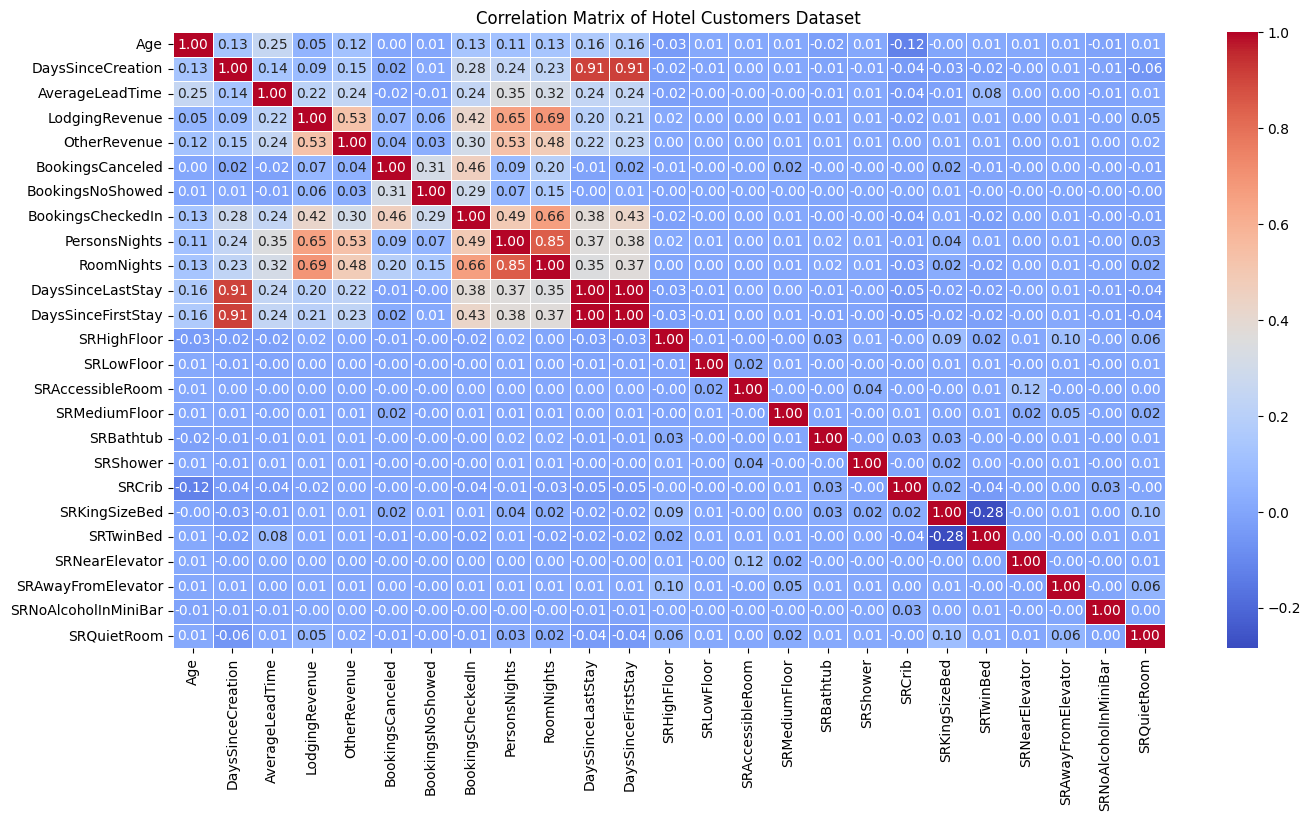

In [13]:
# Correlation Matrix
correlation_matrix = raw_data_copy.corr(numeric_only=True)

plt.figure(figsize=(16, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix of Hotel Customers Dataset")
plt.show()

In [14]:
# Filter columns with correlation coefficient > 0.6 or < -0.6
high_correlation_cols = correlation_matrix[(correlation_matrix.abs() > 0.6) & (correlation_matrix != 1.0)].stack().dropna()
high_correlation_cols = high_correlation_cols[high_correlation_cols.index.get_level_values(0) != high_correlation_cols.index.get_level_values(1)]

print("Columns with correlation coefficient greater than 0.6 or less than -0.6:")
for (col1, col2), corr in high_correlation_cols.items():
    print(f"    {col1} -> {col2}: {corr}")

Columns with correlation coefficient greater than 0.6 or less than -0.6:
    DaysSinceCreation -> DaysSinceLastStay: 0.9082997790818919
    DaysSinceCreation -> DaysSinceFirstStay: 0.9123277676580839
    LodgingRevenue -> PersonsNights: 0.6522670661850658
    LodgingRevenue -> RoomNights: 0.6921535168901558
    BookingsCheckedIn -> RoomNights: 0.6601065323098454
    PersonsNights -> LodgingRevenue: 0.6522670661850658
    PersonsNights -> RoomNights: 0.8489446694239777
    RoomNights -> LodgingRevenue: 0.6921535168901558
    RoomNights -> BookingsCheckedIn: 0.6601065323098454
    RoomNights -> PersonsNights: 0.8489446694239777
    DaysSinceLastStay -> DaysSinceCreation: 0.9082997790818919
    DaysSinceLastStay -> DaysSinceFirstStay: 0.9954008755223194
    DaysSinceFirstStay -> DaysSinceCreation: 0.9123277676580839
    DaysSinceFirstStay -> DaysSinceLastStay: 0.9954008755223194


<Figure size 100x100 with 0 Axes>

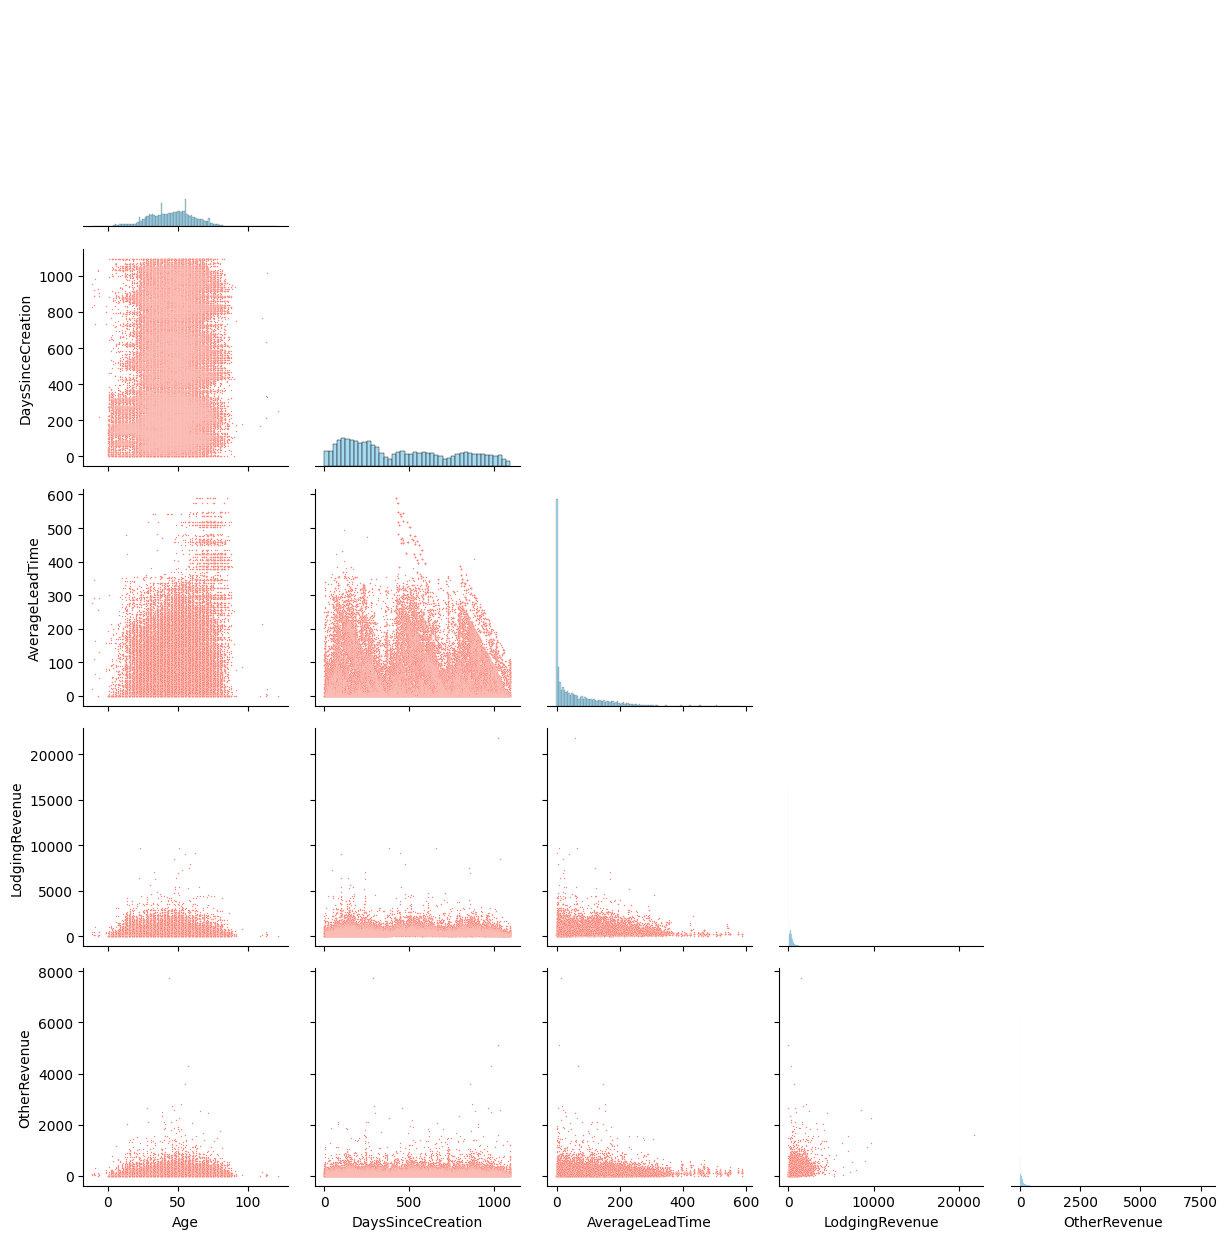

In [15]:
# Pairplot of selected numerical columns
selected_numerical = ["Age", "DaysSinceCreation", "AverageLeadTime", "LodgingRevenue", "OtherRevenue"]

plt.figure(figsize=(1,1))
sns.pairplot(raw_data_copy[selected_numerical], corner=True, plot_kws={'color': 'salmon', 's': 1}, diag_kws={'color': 'skyblue'})
plt.tight_layout()
plt.show()

1. **Age vs. DaysSinceCreation**: There appears to be a uniform distribution of data points. The histogram shows that there is a higher concentration of low values in DaysSinceCreation compared to greater ones.

2. **Age vs. AverageLeadTime**: There is a wide spread in AverageLeadTime for different ages, but with a noticeable concentration around lower lead times. The histogram of AverageLeadTime shows that most values are clustered at the lower end.

3. **Age vs. LodgingRevenue and OtherRevenue**: The scatter plots suggest that LodgingRevenue and OtherRevenue increase with Age, but there are also many instances of high revenue at younger ages, indicating variability.

4. **DaysSinceCreation vs. AverageLeadTime**: The scatter plot shows a range of AverageLeadTime for different DaysSinceCreation, with a denser concentration of data points at lower lead times.

5. **DaysSinceCreation vs. LodgingRevenue and OtherRevenue**: There is a scattered relationship, indicating that LodgingRevenue and OtherRevenue vary widely regardless of DaysSinceCreation.

6. **AverageLeadTime vs. LodgingRevenue and OtherRevenue**: Both scatter plots show that higher lead times generally correspond to a wider spread in revenue values, with some high outliers.

7. **LodgingRevenue vs. OtherRevenue**: There is a positive correlation, as higher LodgingRevenue often accompanies higher OtherRevenue, suggesting that these two revenue streams are related.

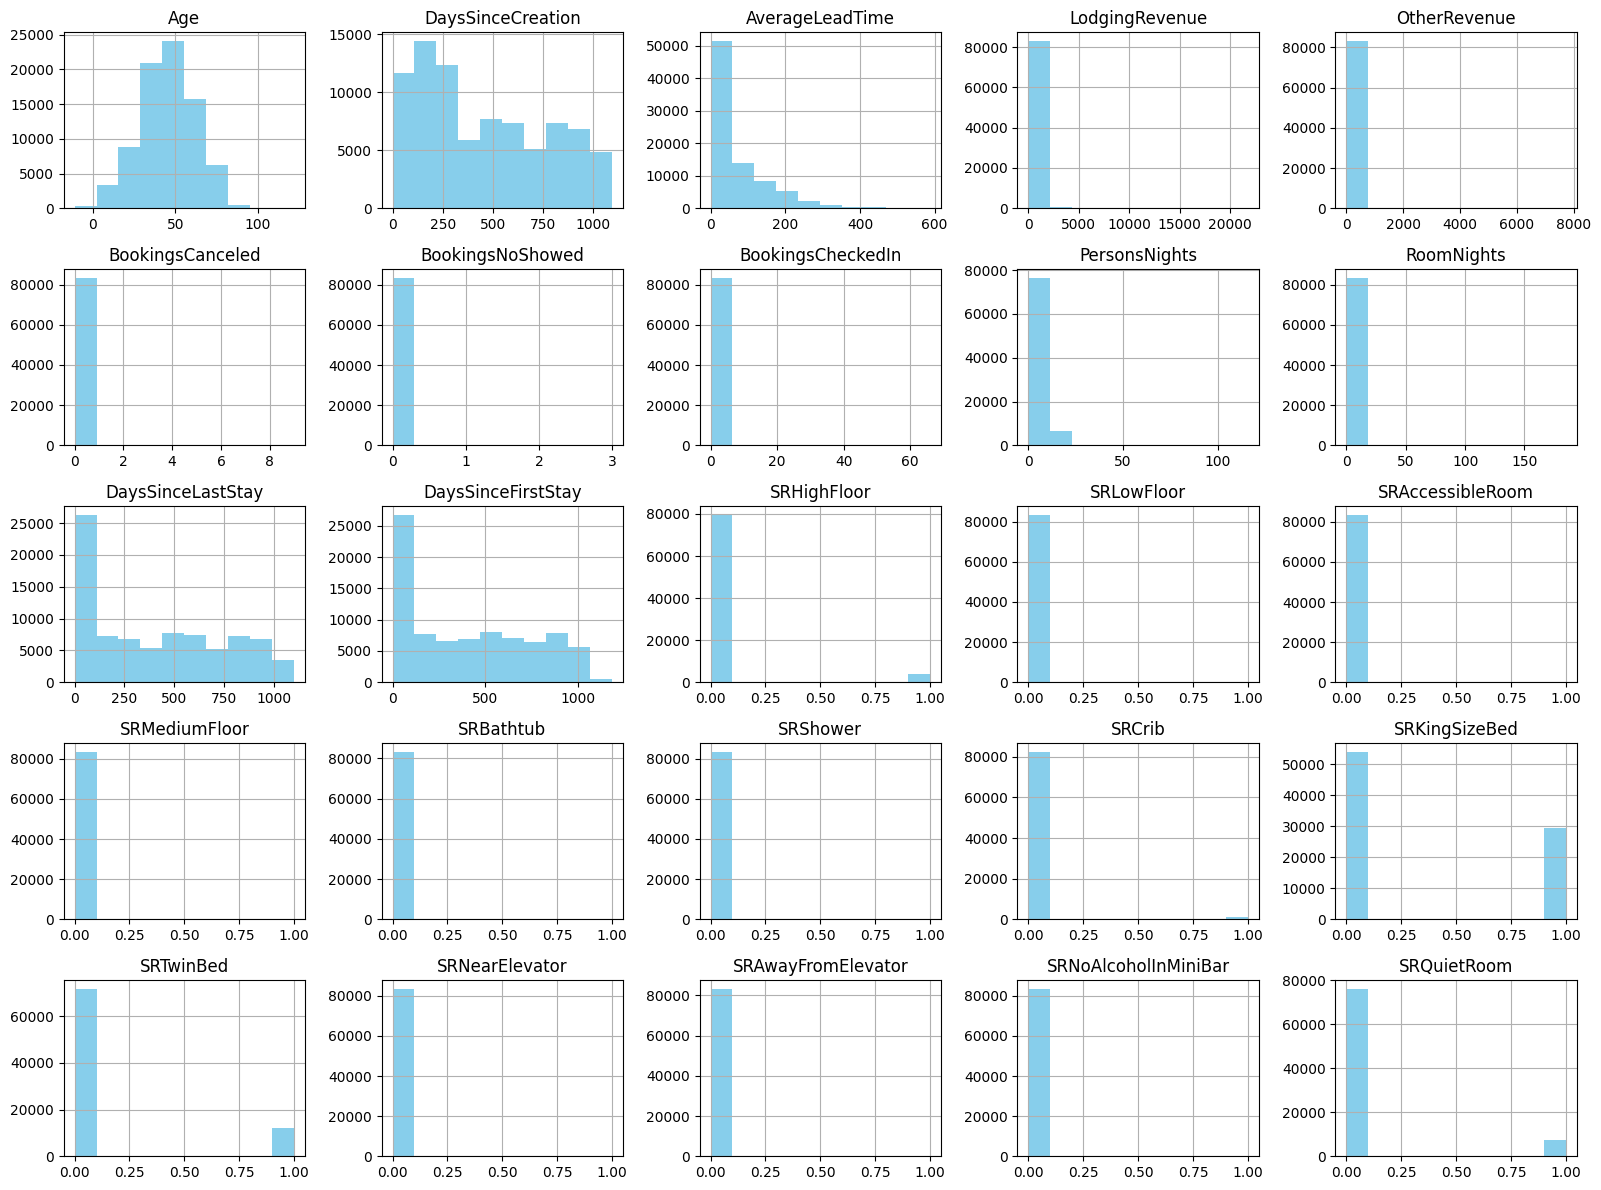

In [16]:
raw_data_copy.hist(figsize=(16, 12), color="skyblue")
plt.tight_layout()
plt.show()

Most of those columns seem to attain only a single value which is investigated later. The *Age* column looks approxmiately normal wheras there are columns that are strongly skewed which should be addressed.

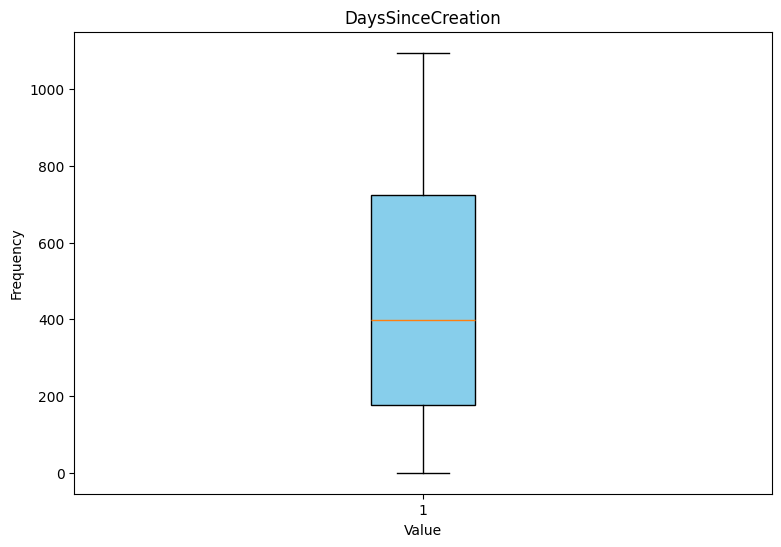

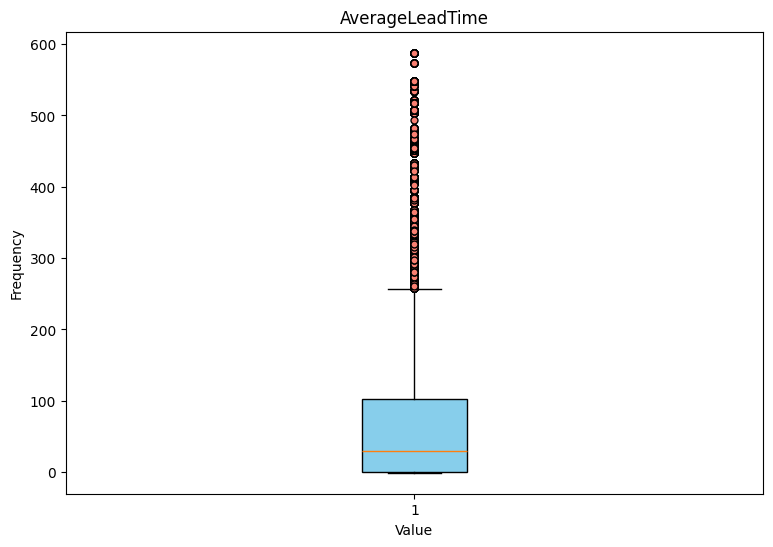

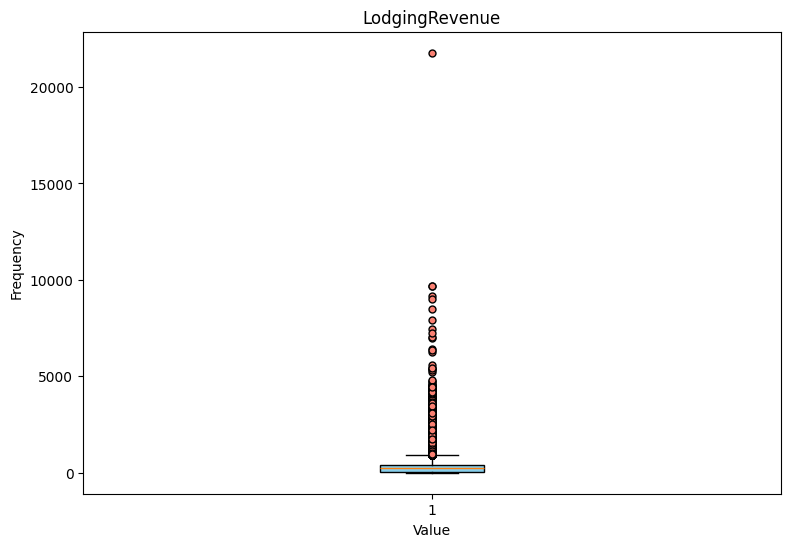

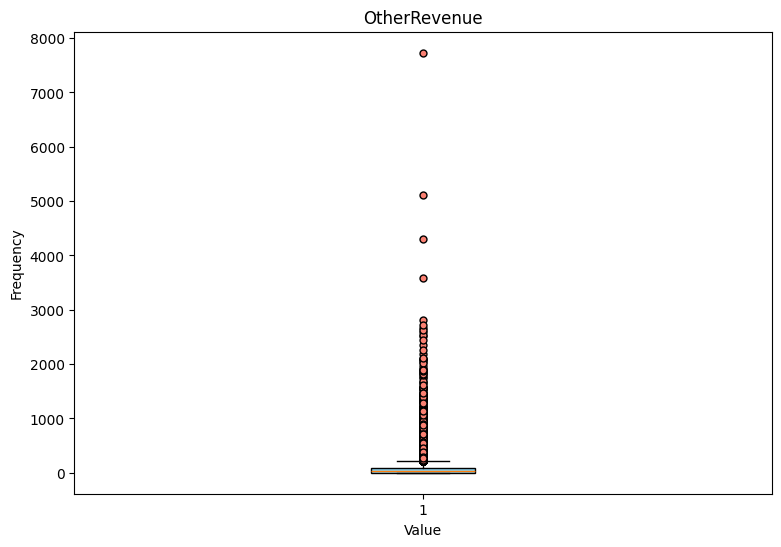

In [17]:
for i in selected_numerical[1:]:
    plt.figure(figsize=(9, 6))
    box = plt.boxplot(raw_data_copy[i], patch_artist=True,
                      flierprops=dict(marker='o', markersize=5, markerfacecolor='salmon'))
    for patch in box['boxes']:
        patch.set(facecolor='skyblue')
    plt.title(i)
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.show()

There are several outliers in those columns.

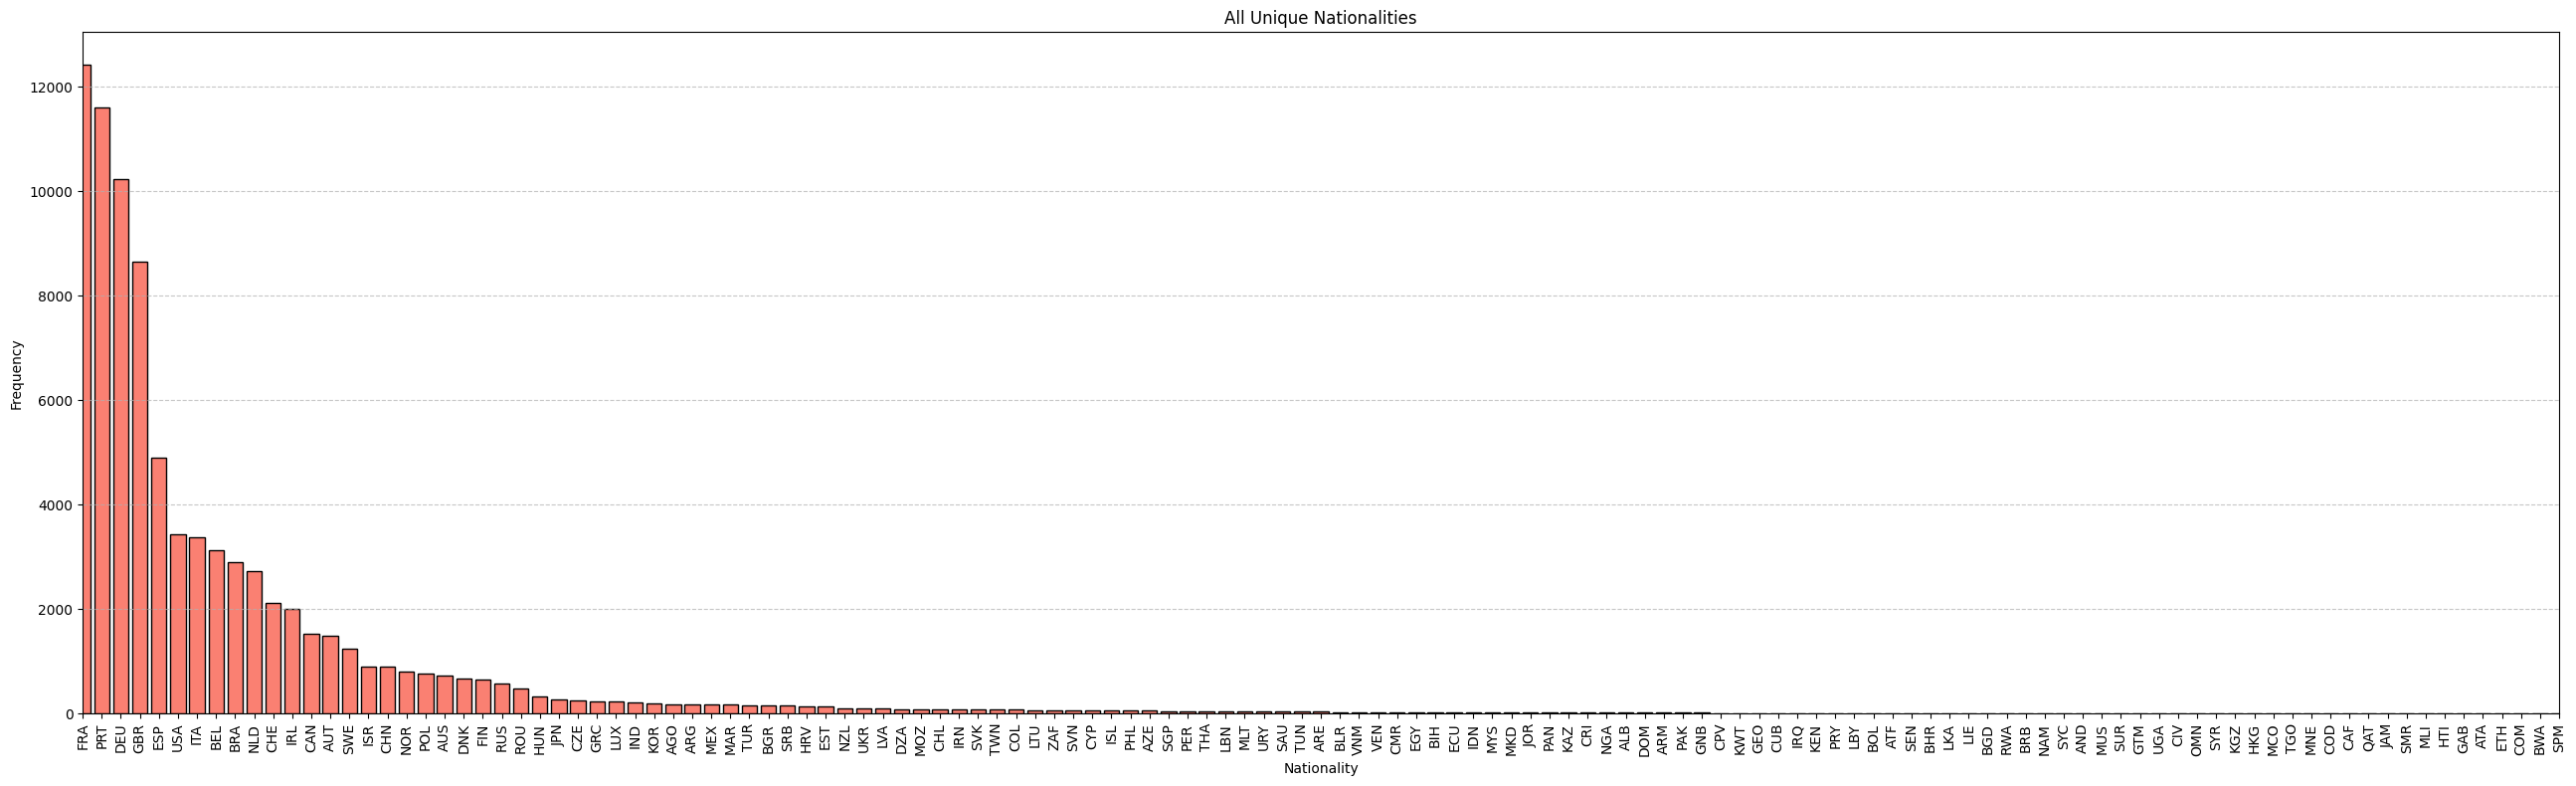

In [18]:
# All unique nationalities
nationality = pd.DataFrame(raw_data_copy["Nationality"].value_counts())
nationalities = nationality.index
counts = nationality['count']

plt.figure(figsize=(26, 8))
plt.bar(nationalities, counts, color='salmon', edgecolor='black')
plt.title('All Unique Nationalities')
plt.xlabel('Nationality')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(ticks=range(len(nationalities)), labels=nationalities, rotation=90)
plt.xlim([0, 130])
plt.tight_layout()
plt.show()

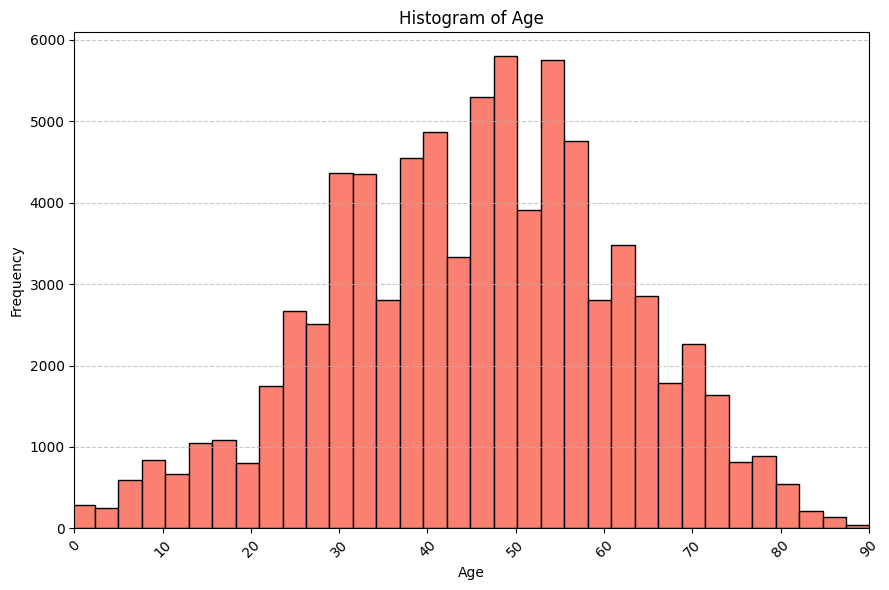

In [19]:
plt.figure(figsize=(9, 6))
plt.hist(raw_data_copy["Age"], bins=50, edgecolor='black', color='salmon')
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.xlim([0, 90])
plt.tight_layout()
plt.show()

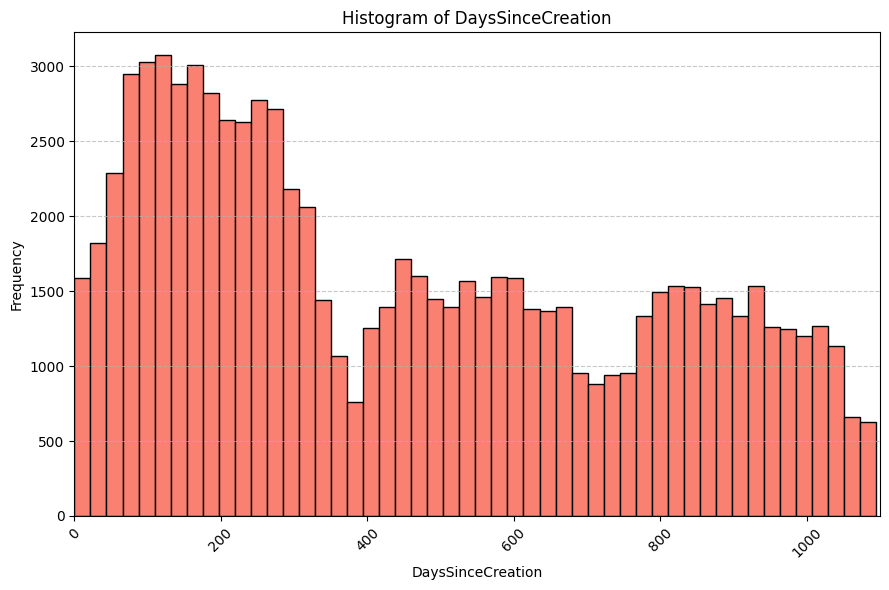

In [20]:
plt.figure(figsize=(9, 6))
plt.hist(raw_data_copy['DaysSinceCreation'], bins=50, edgecolor='black', color='salmon')
plt.title('Histogram of DaysSinceCreation')
plt.xlabel('DaysSinceCreation')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.xlim([0, 1100])
plt.tight_layout()
plt.show()

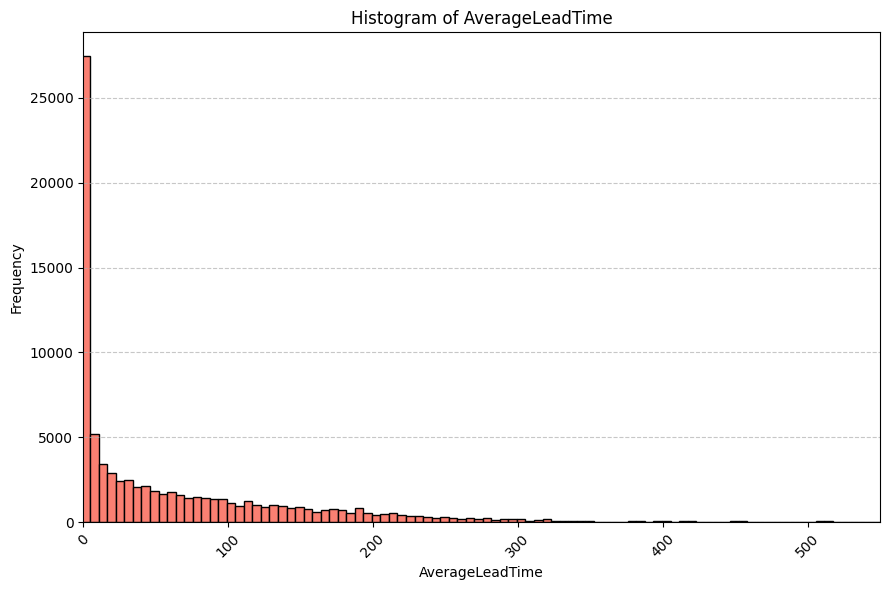

In [21]:
plt.figure(figsize=(9, 6))
plt.hist(raw_data_copy['AverageLeadTime'], bins=100, edgecolor='black', color='salmon')
plt.title('Histogram of AverageLeadTime')
plt.xlabel('AverageLeadTime')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.xlim([0, 550])
plt.tight_layout()
plt.show()

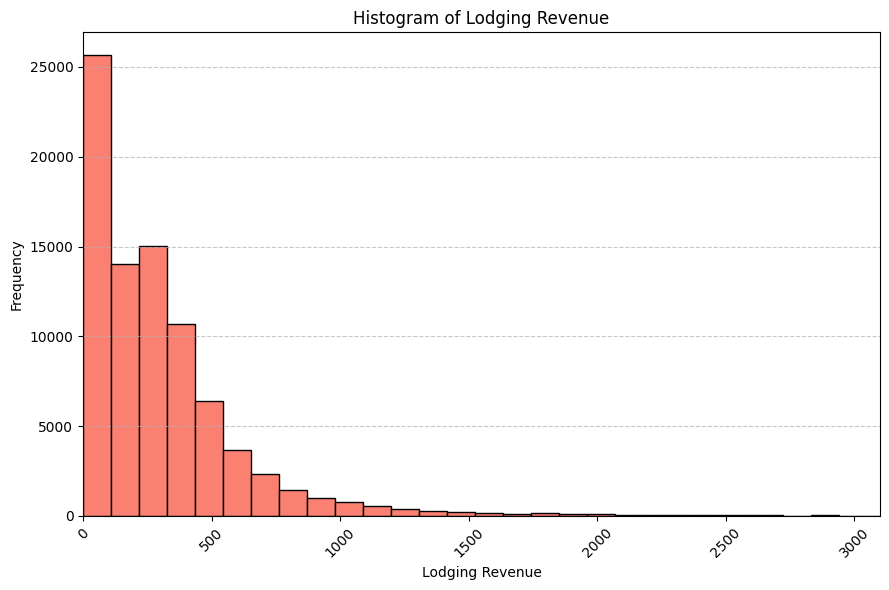

In [22]:
plt.figure(figsize=(9, 6))
plt.hist(raw_data_copy["LodgingRevenue"], bins=200, edgecolor='black', color='salmon')
plt.title('Histogram of Lodging Revenue')
plt.xlabel('Lodging Revenue')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.xlim([0, 3100])
plt.tight_layout()
plt.show()

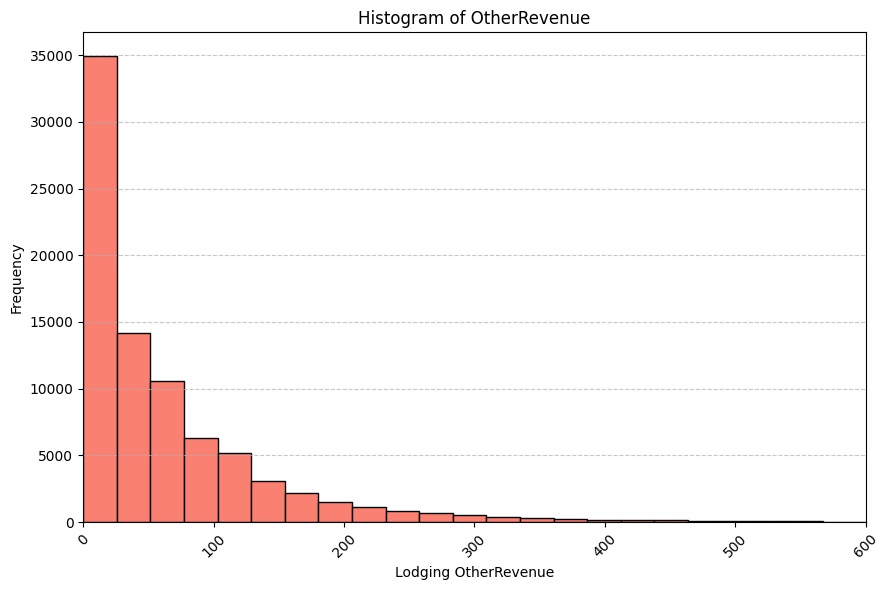

In [23]:
plt.figure(figsize=(9, 6))
plt.hist(raw_data_copy["OtherRevenue"], bins=300, edgecolor='black', color='salmon')
plt.title('Histogram of OtherRevenue')
plt.xlabel('Lodging OtherRevenue')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.xlim([0, 600])
plt.tight_layout()
plt.show()

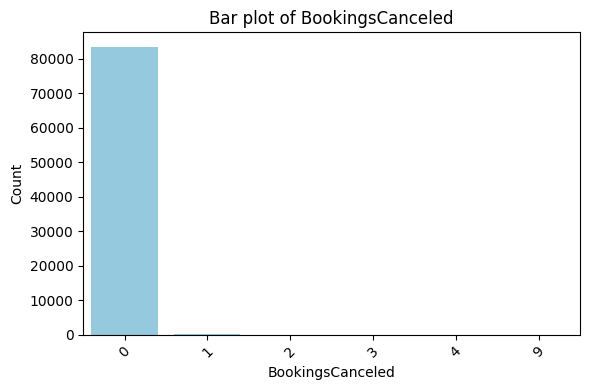

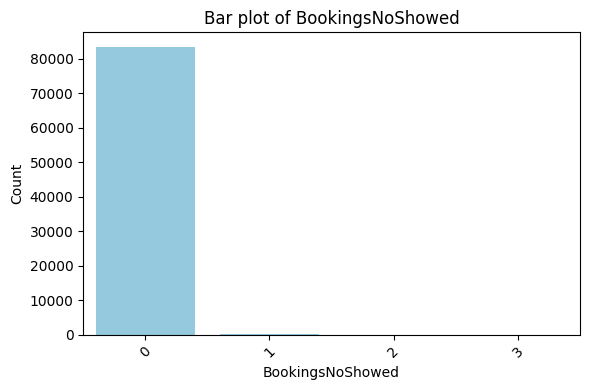

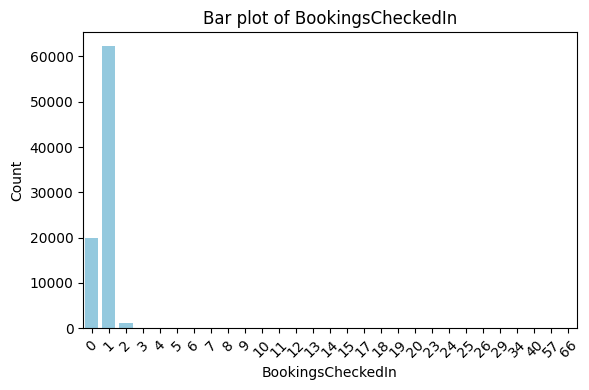

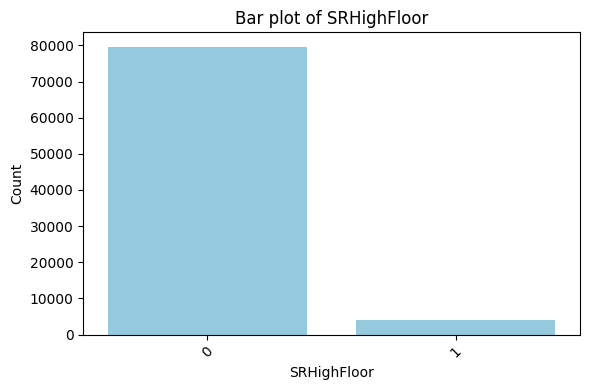

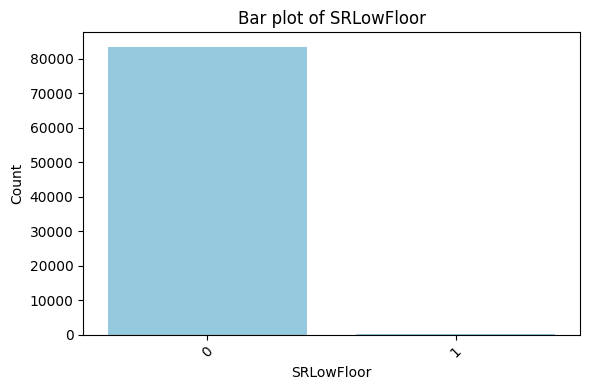

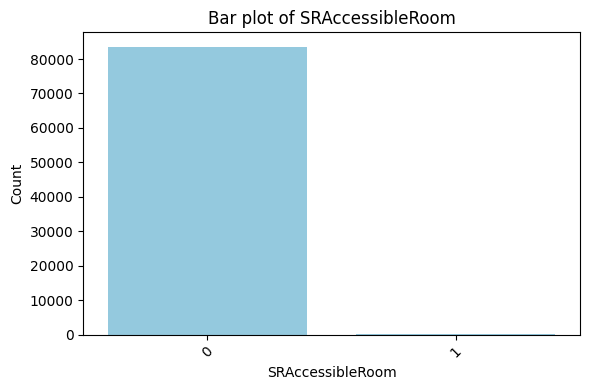

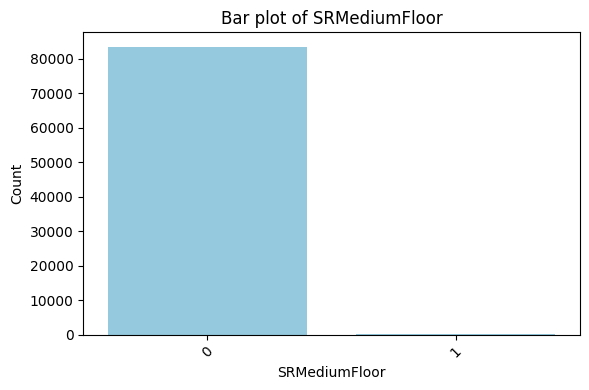

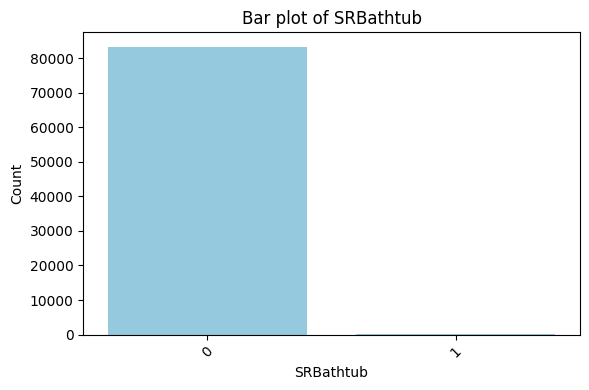

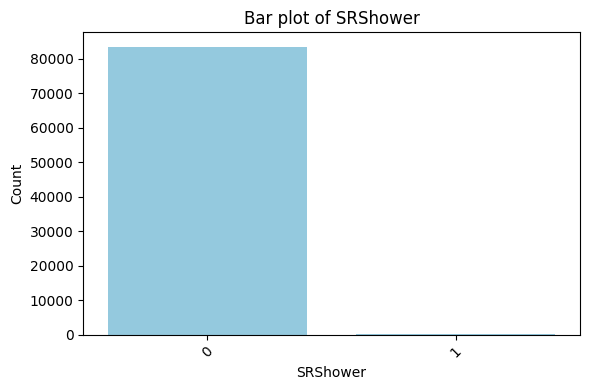

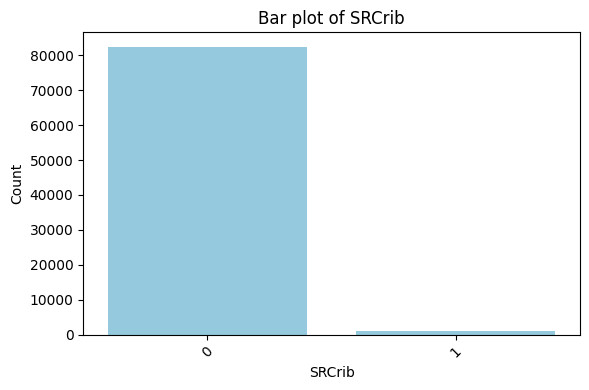

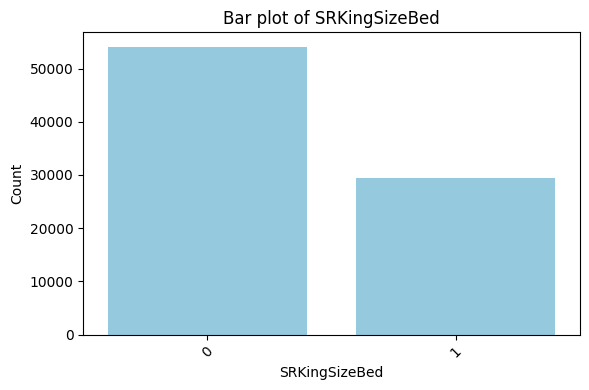

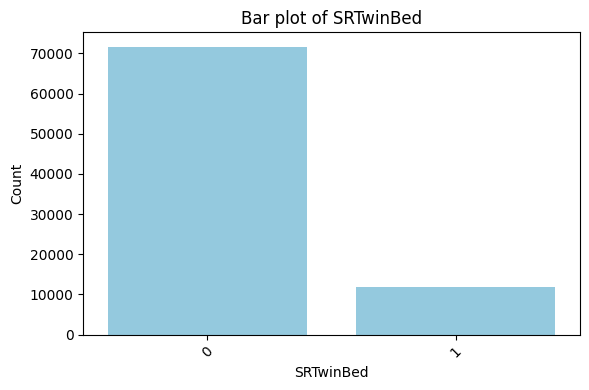

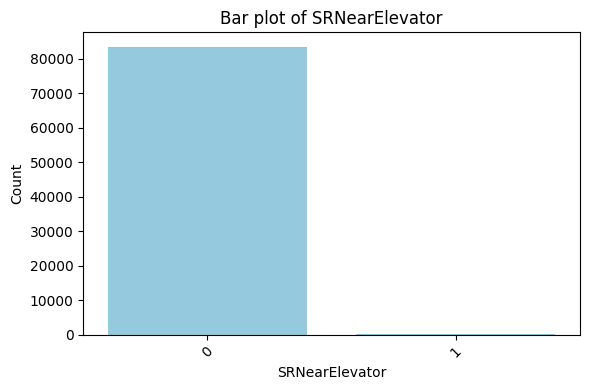

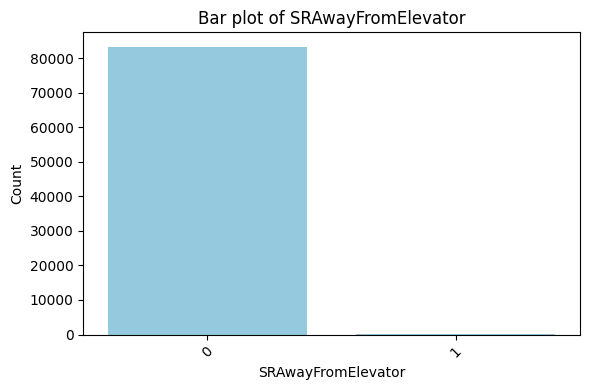

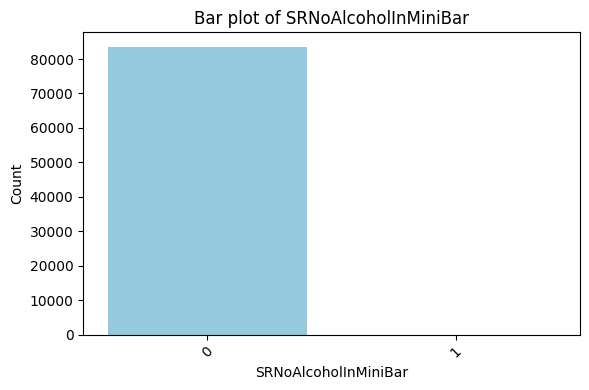

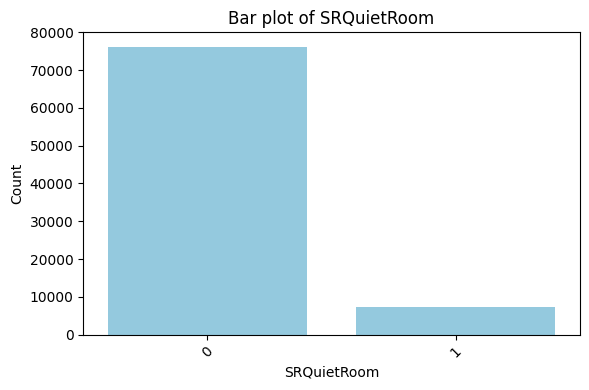

In [24]:
# Bar Plots of columns that names start with SR or Bookings (to visualize what values they have)
columns_to_check = [col for col in raw_data_copy.columns if col.startswith("SR") or col.startswith("Bookings")]

for column in columns_to_check:
    plt.figure(figsize=(6, 4))
    sns.countplot(x=column, data=raw_data_copy, color='skyblue')
    plt.title(f'Bar plot of {column}')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

In [25]:
print("Percentage distribution of categorical columns:\n")

for column in columns_to_check:
    total_count = raw_data_copy[column].count()
    value_counts = raw_data_copy[column].value_counts()
    
    print(f"Column: {column}")
    for value, count in value_counts.items():
        percentage = (count / total_count) * 100
        print(f"  {value}: {percentage:.2f}%")
    print()

Percentage distribution of categorical columns:

Column: BookingsCanceled
  0: 99.86%
  1: 0.11%
  2: 0.01%
  3: 0.01%
  4: 0.01%
  9: 0.00%

Column: BookingsNoShowed
  0: 99.95%
  1: 0.04%
  2: 0.01%
  3: 0.00%

Column: BookingsCheckedIn
  1: 74.43%
  0: 23.83%
  2: 1.37%
  3: 0.16%
  4: 0.07%
  5: 0.02%
  6: 0.02%
  7: 0.02%
  8: 0.01%
  9: 0.01%
  10: 0.01%
  11: 0.01%
  12: 0.00%
  13: 0.00%
  29: 0.00%
  15: 0.00%
  23: 0.00%
  14: 0.00%
  25: 0.00%
  17: 0.00%
  66: 0.00%
  26: 0.00%
  57: 0.00%
  40: 0.00%
  18: 0.00%
  24: 0.00%
  19: 0.00%
  20: 0.00%
  34: 0.00%

Column: SRHighFloor
  0: 95.25%
  1: 4.75%

Column: SRLowFloor
  0: 99.86%
  1: 0.14%

Column: SRAccessibleRoom
  0: 99.97%
  1: 0.03%

Column: SRMediumFloor
  0: 99.91%
  1: 0.09%

Column: SRBathtub
  0: 99.72%
  1: 0.28%

Column: SRShower
  0: 99.83%
  1: 0.17%

Column: SRCrib
  0: 98.68%
  1: 1.32%

Column: SRKingSizeBed
  0: 64.73%
  1: 35.27%

Column: SRTwinBed
  0: 85.75%
  1: 14.25%

Column: SRNearElevator
  0

We want to test the correlation once again, with two new columns created:
1. *PersonsRoomNight* which is the quotient of *PersonsNights* and *RoomNights*
2. *TotalRevenue* as the sum of *LodgingRevenue* and *OtherRevenue*

In [26]:
raw_data_copy["TotalRevenue"] = raw_data_copy["LodgingRevenue"] + raw_data_copy["OtherRevenue"]
raw_data_copy['PersonsRoomNight'] = raw_data_copy['PersonsNights'] / raw_data_copy['RoomNights']
raw_data_copy.fillna({'PersonsRoomNight': 0}, inplace=True)
raw_data_copy = raw_data_copy.drop(columns=["PersonsNights", "RoomNights", "OtherRevenue", "LodgingRevenue"])
raw_data_copy

,Nationality,Age,DaysSinceCreation,NameHash,DocIDHash,AverageLeadTime,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,DaysSinceLastStay,...,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom,TotalRevenue,PersonsRoomNight
ID,,,,,,,,,,,,,,,,,,,,,
1,PRT,51.0,150,0x8E0A7AF39B633D5EA25C3B7EF4DFC5464B36DB7AF375...,0x71568459B729F7A7ABBED6C781A84CA4274D571003AC...,45,1,0,3,151,...,0,0,0,0,0,0,0,0,476.3,1.6
2,PRT,NaN,1095,0x21EDE41906B45079E75385B5AA33287CA09DE1AB86DE...,0x5FA1E0098A31497057C5A6B9FE9D49FD6DD47CCE7C26...,61,0,0,1,1100,...,0,0,0,0,0,0,0,0,333.0,2.0
3,DEU,31.0,1095,0x31C5E4B74E23231295FDB724AD578C02C4A723F4BA2B...,0xC7CF344F5B03295037595B1337AC905CA188F1B5B3A5...,0,0,0,0,-1,...,0,0,0,0,0,0,0,0,0.0,0.0
4,FRA,60.0,1095,0xFF534C83C0EF23D1CE516BC80A65D0197003D27937D4...,0xBD3823A9B4EC35D6CAF4B27AE423A677C0200DB61E82...,93,0,0,1,1100,...,0,0,0,0,0,0,0,0,300.0,2.0
5,FRA,51.0,1095,0x9C1DEF02C9BE242842C1C1ABF2C5AA249A1EEB4763B4...,0xE175754CF77247B202DD0820F49407C762C14A603B3A...,0,0,0,0,-1,...,0,0,0,0,0,0,0,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83586,ITA,54.0,0,0x68010434A46BA6CEAFFACF00B7B7CD0E1825DC56E68F...,0x0A4038E9AE1E4E5A14832BEACEC6BCBE2219F275B65C...,0,0,0,0,-1,...,0,0,0,0,0,0,0,0,0.0,0.0
83587,IRL,47.0,0,0x6DE7954E6AF065D29EF5C57D0DC8120FBAE6753D2CCB...,0xC0654B6A53840DD95DAE429966EC16E2A11FB186CC7B...,109,0,0,1,3,...,0,0,1,0,0,0,0,0,604.6,2.0
83588,IRL,53.0,0,0x533C977BA6D1D8DFAD8D8D4C2250236D16EFD17B9F35...,0x3DCBEB254247836015CA95F0BBF42E6AF6A158380663...,0,0,0,0,-1,...,0,0,1,0,0,0,0,0,0.0,0.0


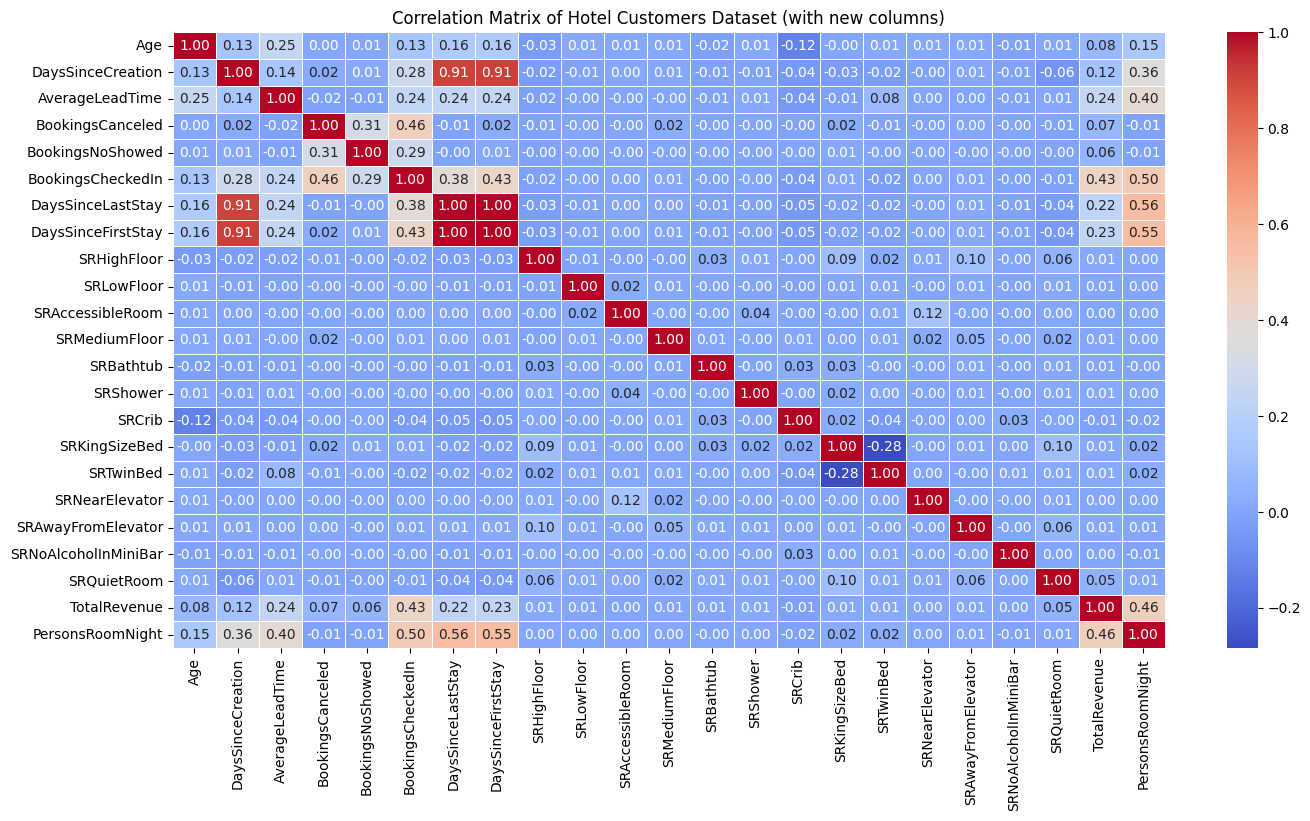

In [27]:
# Correlation Matrix (with new columns)
correlation_matrix = raw_data_copy.corr(numeric_only=True)

plt.figure(figsize=(16, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix of Hotel Customers Dataset (with new columns)")
plt.show()

In [28]:
# Filter columns with correlation coefficient > 0.6 or < -0.6
high_correlation_cols = correlation_matrix[(correlation_matrix.abs() > 0.6) & (correlation_matrix != 1.0)].stack().dropna()
high_correlation_cols = high_correlation_cols[high_correlation_cols.index.get_level_values(0) != high_correlation_cols.index.get_level_values(1)]

print("Columns with correlation coefficient greater than 0.6 or less than -0.6:")
for (col1, col2), corr in high_correlation_cols.items():
    print(f"    {col1} -> {col2}: {corr}")

Columns with correlation coefficient greater than 0.6 or less than -0.6:
    DaysSinceCreation -> DaysSinceLastStay: 0.9082997790818919
    DaysSinceCreation -> DaysSinceFirstStay: 0.9123277676580839
    DaysSinceLastStay -> DaysSinceCreation: 0.9082997790818919
    DaysSinceLastStay -> DaysSinceFirstStay: 0.9954008755223194
    DaysSinceFirstStay -> DaysSinceCreation: 0.9123277676580839
    DaysSinceFirstStay -> DaysSinceLastStay: 0.9954008755223194


As we can see the number of highly correlated columns decreased significantly, therefore the idea of adding to new columns gets approved.

# Data Cleaning and Preprocessing

### 1. Adding New Columns

As described in the EDA section we form new columns:
1. *PersonsRoomNight* which is the quotient of *PersonsNights* and *RoomNights*
2. *TotalRevenue* as the sum of *LodgingRevenue* and *OtherRevenue*

This contributes to reducing dimentionality of the dataset and limiting the number of highly correlated columns.

### 2. Removing Insiginficant Columns

Firstly, we dispose of the columns that were used to creating new ones, these are:
- *PersonsNights*
- *RoomNights*
- *LodgingRevenue*
- *OtherRevenue*

Knowing the independent variables that are highly correlated  (correlation coefficient > 0.6), we decide to remove the following columns:
- *DaysSinceFirstStay*
- *DaysSinceLastStay*

For the categorical columns, we defined threshold of 95%, meaning the column with one category gathering over 95% of data is removed. As the result, the following columns are gone:
- *BookingsCanceled*
- *BookingsNoShowed*
- *SRHighFloor*
- *SRLowFloor*
- *SRAccessibleRoom*
- *SRMediumFloor*
- *SRBathtub*
- *SRShower*
- *SRCrib*
- *SRNearElevator*
- *SRAwayFromElevator*
- *SRNoAlcoholInMiniBar*

Additionaly, two columns: 
- *NameHash*
- *DocIDHash* 

are also dropped, as they do not convey any informative value.

### 3. Removing Duplicates
Duplicated records are deleted using `DuplicateRemover`.

### 4. Deleting Records with Specific Values

Then, since we are assigned to clustering hotel's customers, in this approach we assume that a customer is a person that paid for the stay (no matter if the one appeared in the hotel or not). Therefore, the records where *LodgingRevenue* is **0** are removed.

Moreover, the average number of days elapsed between the customer's booking date and arrival date cannot be equal to -1 (since there is a handful of such instances). As a result, the records where *AverageLeadTime* is **-1** are also removed.

`ConditionalRowRemover` is applied for this purpose.

### 5. Handling Missing Values
The only column having missing values is *Age*. They are substituted by the mean of this column, since only **3.01%** of data from this column needs to be imputed.

### 6. Removing Outliers
`OutlierRemover_IQR` gets rid of records based on IQR method (with 1.5 threshold).

### 7. Encoding Categorical Features

The columns:
- *DistributionChannel*
- *MarketSegment*
- *Nationality*

are endoded using `CustomLabelEncoder`.

### 8. Normalization

Since the data for clustering is very sensitive to distances `NormalizeTransformer` ensures that **l2** norm is shared across all columns of the dataframe.

### 9. Data Transformation and Standardization

Numerical columns are transformed using `CustomPowerTransformer` which aims to make data more Gaussian-like. Then, those columns are also standardized to ensure common scaling between them.

## Initial Preprocessing Pipeline

In [29]:
almost_final_pipeline = make_pipeline(
    NewColumnTransformer(columns=["LodgingRevenue", "OtherRevenue"], operation="add", new_column_name="TotalRevenue"),
    NewColumnTransformer(columns=["PersonsNights", "RoomNights"], operation="divide", new_column_name="PersonsRoomNight"),
    ColumnDropper(columns_to_drop=["PersonsNights", "RoomNights", "LodgingRevenue", "OtherRevenue", 
                                   "DaysSinceFirstStay", "DaysSinceLastStay",
                                   "BookingsCanceled", "BookingsNoShowed", 
                                   "SRHighFloor", "SRLowFloor", "SRAccessibleRoom", "SRMediumFloor", 
                                   "SRBathtub", "SRShower", "SRCrib", "SRNearElevator", "SRAwayFromElevator", 
                                   "SRNoAlcoholInMiniBar", "NameHash", "DocIDHash"]),
    DuplicateRemover(),
    ConditionalRowRemover(conditions={
    "LodgingRevenue": 0,    # Assuming total amount spent on lodging expenses by the customer cannot be 0
    "AverageLeadTime": -1   # Assuming, the average number of days elapsed between the customer's booking date and arrival date cannot be negative
                            # The only negative value appearing in this column is -1
    }),
    CustomImputer(strategy="mean", columns=["Age"]),
    OutlierRemover_IQR(),
    CustomLabelEncoder(columns=["Nationality", "DistributionChannel", "MarketSegment"]),
    NormalizeTransformer(norm='l2'),
    CustomPowerTransformer(columns=["Nationality", "Age", "DaysSinceCreation", "BookingsCheckedIn",
                                    "AverageLeadTime", "SRKingSizeBed", "PersonsRoomNight", "TotalRevenue",
                                    "MarketSegment", "DistributionChannel"], standardize=True)
)

In [30]:
df_almost_done = almost_final_pipeline.fit_transform(raw_data)
df_almost_done

,Nationality,Age,DaysSinceCreation,AverageLeadTime,BookingsCheckedIn,DistributionChannel,MarketSegment,SRKingSizeBed,SRTwinBed,SRQuietRoom,TotalRevenue,PersonsRoomNight
0,0.191678,-1.028996,1.065046,-0.330461,-1.403494,-0.578791,-0.540180,-0.771281,0.0,0.0,-0.992226,-0.869626
1,-0.909851,-0.461804,1.126764,0.076332,-1.376034,-0.564361,-0.518716,-0.771281,0.0,0.0,-1.090947,-0.849594
2,-0.386063,-0.652447,1.194944,-0.354879,-1.346404,-0.548729,-0.876668,-0.771281,0.0,0.0,-1.235087,-0.827939
3,-1.020797,-1.761597,0.562694,-0.720633,-1.653111,-0.707536,-1.099665,0.696376,0.0,0.0,-0.205654,-1.050195
4,-0.543916,-1.947924,1.203183,0.122708,-1.342872,-0.546861,-0.492773,-0.771281,0.0,0.0,-1.271152,-0.825355
...,...,...,...,...,...,...,...,...,...,...,...,...
42609,2.029290,1.560795,-1.826972,-1.104718,1.840964,-0.076577,1.066906,-0.771281,0.0,0.0,1.242456,2.325770
42610,0.446794,1.548524,-1.826972,-0.211635,1.639759,1.713482,1.721905,-0.771281,0.0,0.0,1.580201,1.721576
42611,1.664891,2.193346,-1.826972,1.956204,2.098927,2.621148,2.366826,1.876970,0.0,0.0,0.842081,2.326153
42612,0.893060,1.085995,-1.826972,1.378949,1.011023,1.029028,1.062517,-0.771281,0.0,0.0,1.464383,1.084856


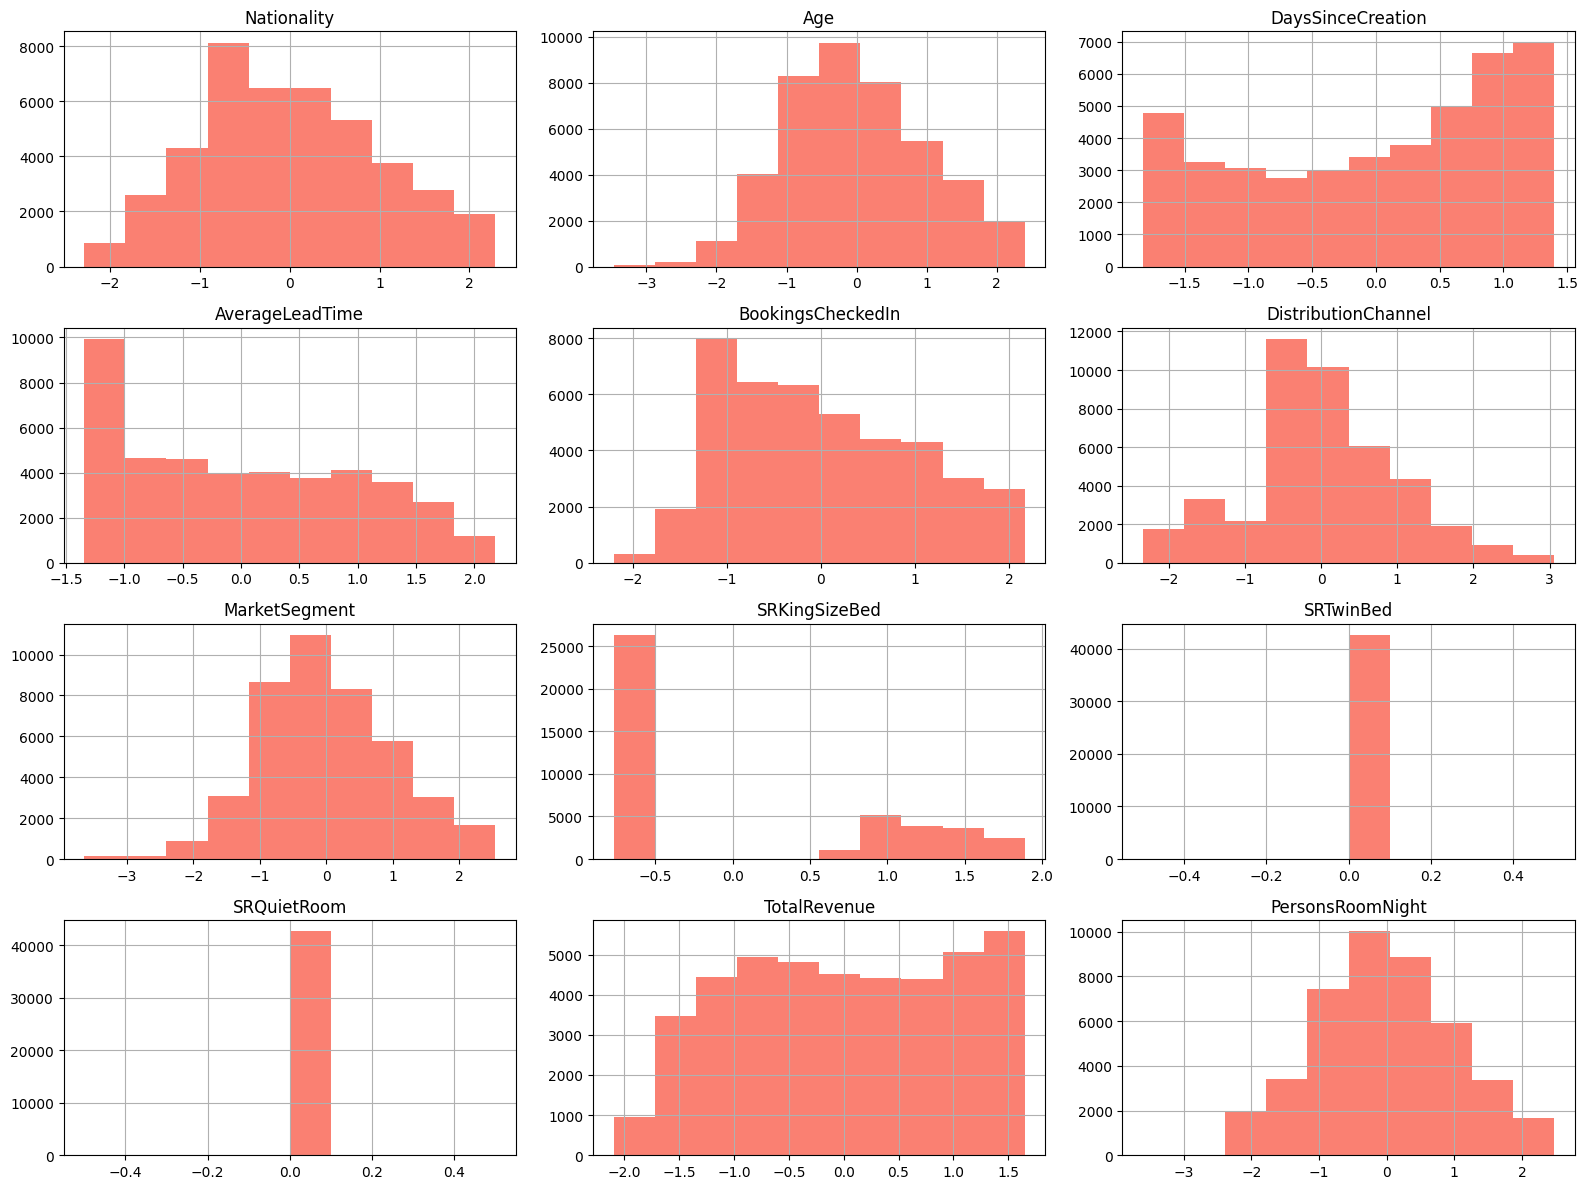

In [31]:
# Histograms after transormations
df_almost_done.hist(figsize=(16, 12), color="salmon")
plt.tight_layout()
plt.show()

We want to examine some categorical columns after preprocessing. It seems that removing outliers, significantly changed the distribution of some of them. Leaving only data beloning to one category. And in fact, simply looking at the histograms, we 3 more columns:
- *SRKingSizeBed*
- *SRTwinBed*
- *SRQuietRoom*

## Final Preprocessing Pipeline

In [32]:
final_preprocessing_pipeline = make_pipeline(
    NewColumnTransformer(columns=["LodgingRevenue", "OtherRevenue"], operation="add", new_column_name="TotalRevenue"),
    NewColumnTransformer(columns=["PersonsNights", "RoomNights"], operation="divide", new_column_name="PersonsRoomNight"),
    ColumnDropper(columns_to_drop=["PersonsNights", "RoomNights", "LodgingRevenue", "OtherRevenue", 
                                   "DaysSinceFirstStay", "DaysSinceLastStay",
                                   "BookingsCanceled", "BookingsNoShowed", 
                                   "SRHighFloor", "SRLowFloor", "SRAccessibleRoom", "SRMediumFloor", 
                                   "SRBathtub", "SRShower", "SRCrib", "SRNearElevator", "SRAwayFromElevator", 
                                   "SRNoAlcoholInMiniBar", "NameHash", "DocIDHash", 
                                   "SRKingSizeBed", "SRTwinBed", "SRQuietRoom"]),   # New columns to drop
    DuplicateRemover(),
    ConditionalRowRemover(conditions={
    "LodgingRevenue": 0,    # Assuming total amount spent on lodging expenses by the customer cannot be 0
    "AverageLeadTime": -1   # Assuming, the average number of days elapsed between the customer's booking date and arrival date cannot be negative
                            # The only negative value appearing in this column is -1
    }),
    CustomImputer(strategy="mean", columns=["Age"]),
    OutlierRemover_IQR(),
    CustomLabelEncoder(columns=["Nationality", "DistributionChannel", "MarketSegment"]),
    NormalizeTransformer(norm='l2'),
    CustomPowerTransformer(columns=["Nationality", "Age", "DaysSinceCreation", "BookingsCheckedIn",
                                    "AverageLeadTime", "PersonsRoomNight", "TotalRevenue",
                                    "MarketSegment", "DistributionChannel"], standardize=True)
)

In [33]:
df_done = final_preprocessing_pipeline.fit_transform(raw_data)
df_done

,Nationality,Age,DaysSinceCreation,AverageLeadTime,BookingsCheckedIn,DistributionChannel,MarketSegment,TotalRevenue,PersonsRoomNight
0,0.242000,-1.026607,1.098050,-0.380854,-1.424965,-0.628480,-0.562721,-1.046229,-0.928053
1,-0.895943,-0.457182,1.160096,0.023587,-1.395632,-0.613000,-0.539656,-1.142376,-0.906943
2,-0.372088,-0.648678,1.226269,-0.404759,-1.365063,-0.596801,-0.912662,-1.282708,-0.884897
3,-1.009025,-1.760942,0.608823,-0.765386,-1.682359,-0.761714,-1.145564,-0.265876,-1.111520
4,-0.529811,-1.947610,1.234320,0.069863,-1.361392,-0.594851,-0.512710,-1.317700,-0.882247
...,...,...,...,...,...,...,...,...,...
53209,0.485914,1.568604,-1.825687,-0.263162,1.670161,1.737832,1.753439,1.568743,1.727605
53210,1.686063,2.223972,-1.825687,1.961614,2.114751,2.660245,2.385791,0.796589,2.354577
53211,0.915172,1.100702,-1.825687,1.347244,1.043427,1.034838,1.088194,1.447341,1.071843
53212,0.360198,0.313542,-1.825687,0.930718,0.344400,0.458332,0.448206,1.550756,0.443778


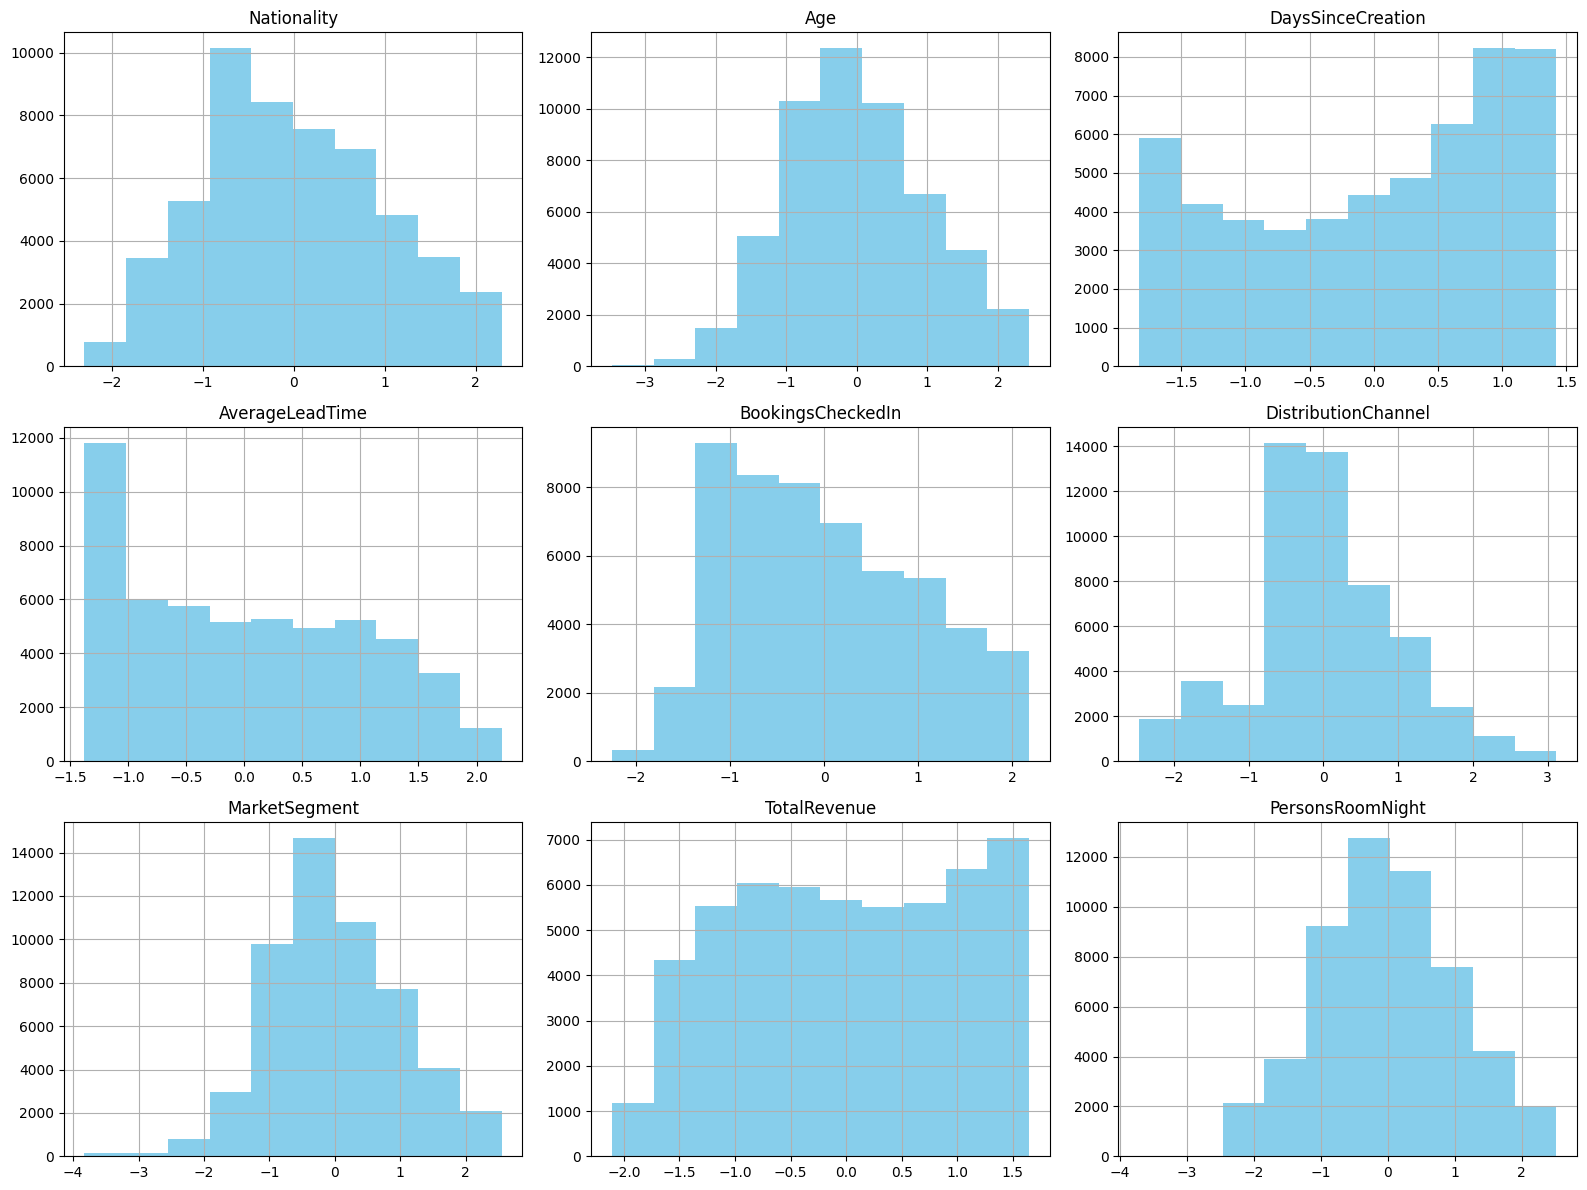

In [34]:
# Histograms without removed columns
df_done.hist(figsize=(16, 12), color="skyblue")
plt.tight_layout()
plt.show()